In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [66]:
iris = pd.read_csv('iris.csv', header = None, names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


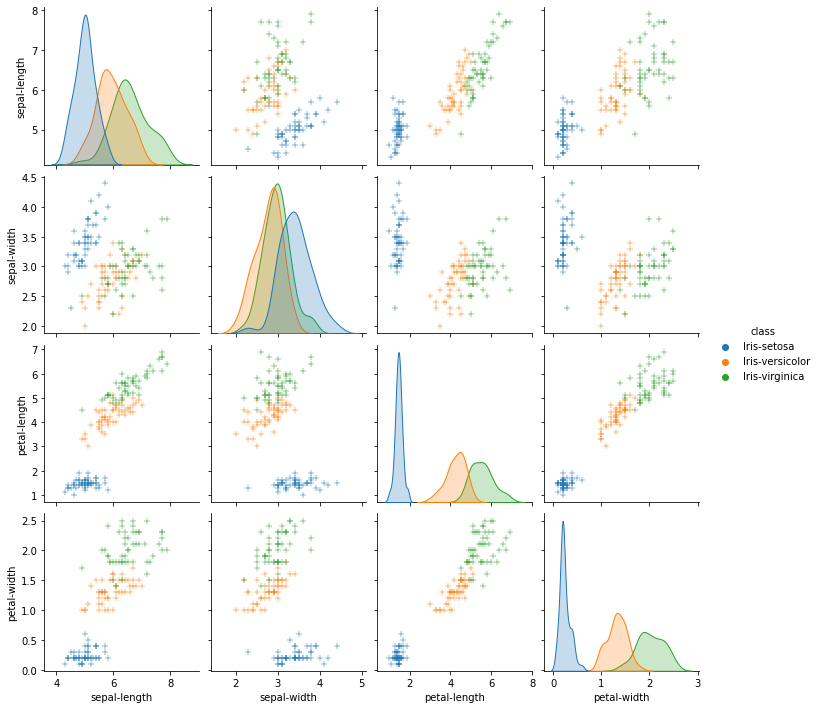

In [69]:
_ = sns.pairplot(iris, hue='class', markers='+')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


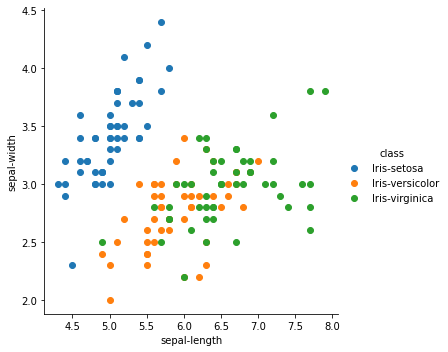

In [135]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
_ = sns.FacetGrid(iris, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

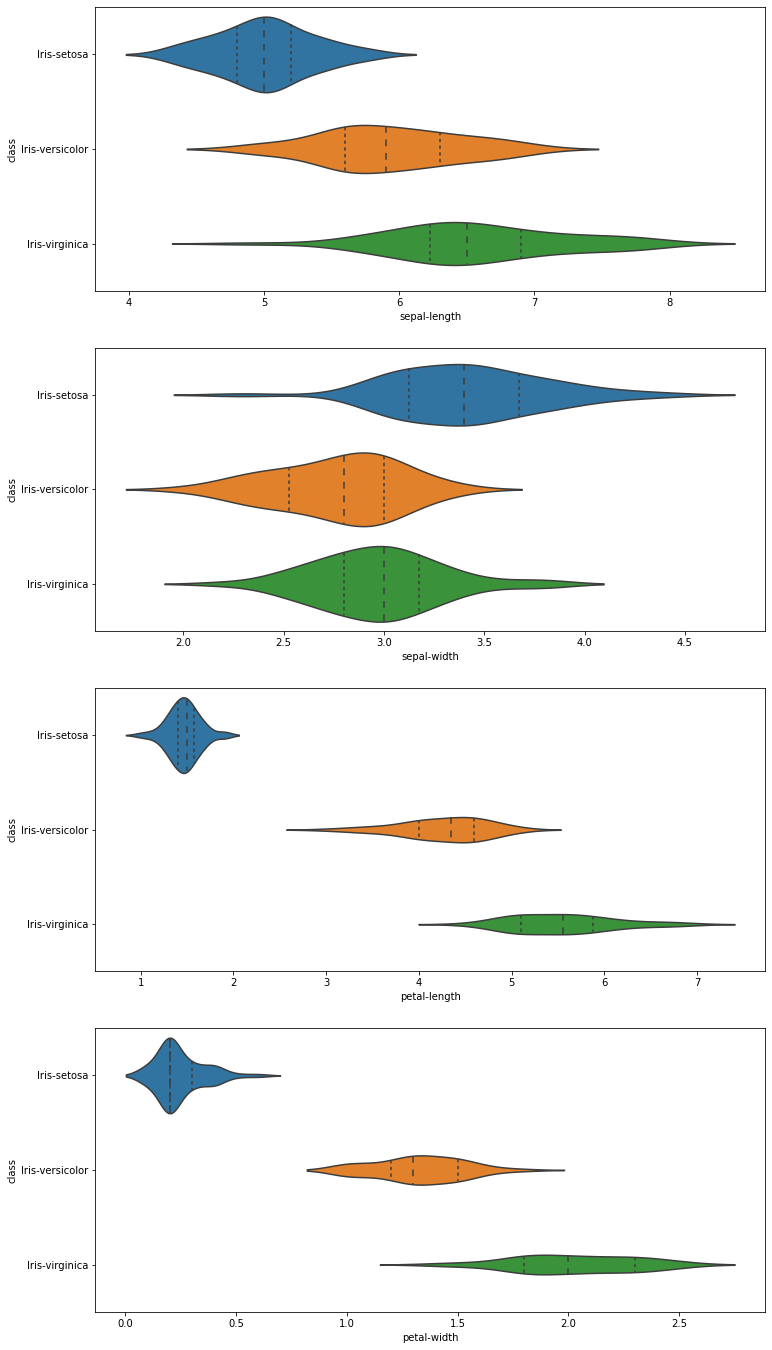

In [132]:
fig, axes = plt.subplots(4, 1, figsize=(12,24))
cols = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

for idx, col in enumerate(cols):
    _ = sns.violinplot(y='class', x=col, data=iris, inner='quartile', ax = axes[idx])

plt.show()

In [72]:
X = iris.drop(['class'], axis=1)
y = iris['class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


### Train and test on the same dataset
- This method is not suggested since the end goal is to predict iris species using a dataset the - model has not seen before.
- There is also a risk of overfitting the training data.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [115]:
X = iris.drop('class', axis = 1)
y = iris['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [117]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The accuracy of the DecisionTreeClasifier on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the DecisionTreeClasifier on test data is 0.9666666666666667


In [118]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('The accuracy of the GaussianNB on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the GaussianNB on test data is 0.9666666666666667


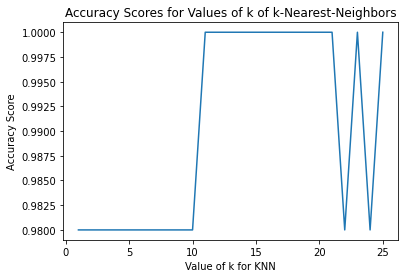

In [85]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy of the KNN on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the KNN on test data is 1.0


In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('The accuracy of the LinearDiscriminantAnalysis on test data is', metrics.accuracy_score(y_test, y_pred))

In [87]:
svm = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.score(X_test, y_test)

print('The accuracy of the svm classifier on test data is', y_pred)

The accuracy of the svm classifier on test data is 1.0


In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('The accuracy of the Logistic regressor on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the Logistic regressor on test data is 1.0
